In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [4]:
df.duplicated().sum()

1049

In [5]:
df=df.drop_duplicates()
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [6]:
df.shape

(12151, 7)

### 1. Outlier Removal Using Mean Function

In [8]:
mean=df.price_per_sqft.mean()
mean

8132.641840177763

In [9]:
median=df.price_per_sqft.median()
median

5500.0

In [10]:
mode=df.price_per_sqft.mode()
mode

0    5000
Name: price_per_sqft, dtype: int64

There is difference between mean and median value which indicates the presence of outlier

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

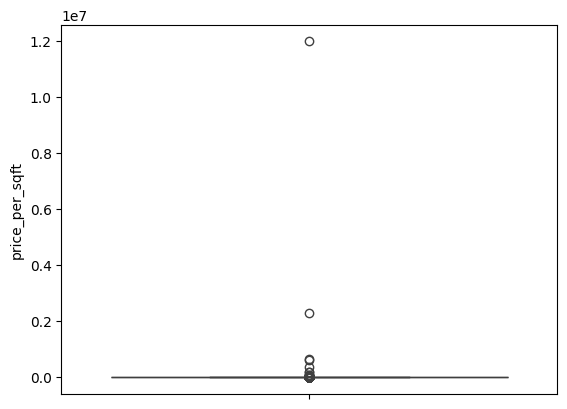

In [12]:
sns.boxplot(df['price_per_sqft'])
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_10852\3860391526.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


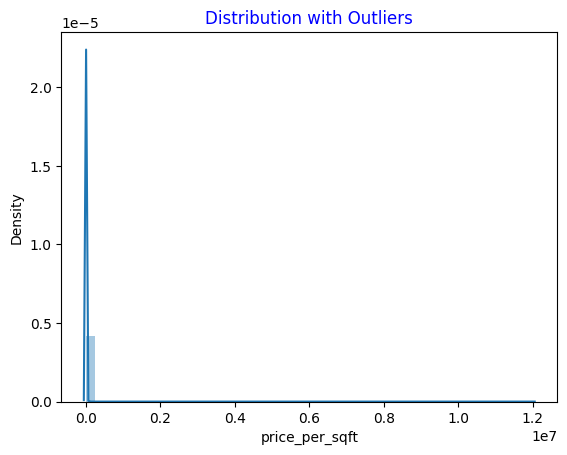

In [13]:
sns.distplot(df['price_per_sqft'])
plt.title('Distribution with Outliers',color='b')
plt.show()

In [14]:
#percentile by using quantile()
df.price_per_sqft.quantile([0.05,0.1,0.25,0.5,0.75,0.8,0.85,0.90,0.91,0.92,0.93])

0.05     3150.0
0.10     3513.0
0.25     4312.0
0.50     5500.0
0.75     7461.0
0.80     8235.0
0.85     9674.5
0.90    11904.0
0.91    12500.0
0.92    13129.0
0.93    13835.5
Name: price_per_sqft, dtype: float64

#### There is variation between 85th and 90th percentile which indicates outliers

In [15]:
#outliers
df[df.price_per_sqft>df.price_per_sqft.quantile(0.85)] 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592
18,other,3 BHK,2770.0,4.0,290.0,3,10469
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
...,...,...,...,...,...,...,...
13170,Sarjapur Road,4 BHK,4050.0,2.0,450.0,4,11111
13176,Cox Town,2 BHK,1200.0,2.0,140.0,2,11666
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13196,other,4 BHK,3600.0,5.0,400.0,4,11111


In [16]:
#without outliers
df1=df[df.price_per_sqft<df.price_per_sqft.quantile(0.95)] 
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


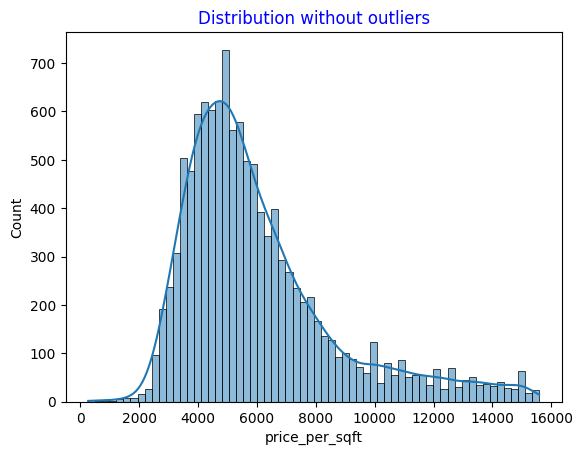

In [17]:
sns.histplot(df1.price_per_sqft,kde=True)
plt.title('Distribution without outliers',color='b')
plt.show()

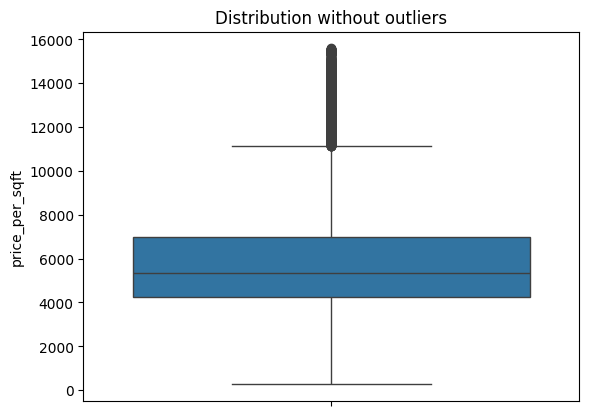

In [18]:
sns.boxplot(df1['price_per_sqft'])
plt.title('Distribution without outliers')
plt.show()

In [19]:
print("Number of Outliers:",len(df)-len(df1))

Number of Outliers: 609


#### Removed 609 outliers from the given dataset by using the mean function, results a bell-shape curve in distplot



### 2. Outlier Removal Using Percentile Method

In [20]:
upper_limit=df['price_per_sqft'].quantile(0.95)
print("Upper Limit =",upper_limit)
lower_limit=df['price_per_sqft'].quantile(0.05)
print("Lower Limit =",lower_limit)

Upper Limit = 15600.0
Lower Limit = 3150.0


In [21]:
#finding outliers
df.loc[(df['price_per_sqft']>upper_limit) | (df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.00,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.00,8,33333
...,...,...,...,...,...,...,...
13121,Electronic City Phase II,3 BHK,1651.0,3.0,49.53,3,3000
13141,other,3 Bedroom,2000.0,2.0,360.00,3,18000
13142,other,2 BHK,1140.0,1.0,185.00,2,16228
13155,Kothannur,4 Bedroom,1600.0,4.0,45.00,4,2812


In [22]:
#deleting the outliers
df2=df.loc[(df['price_per_sqft']<=upper_limit) & (df['price_per_sqft']>=lower_limit)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


Data set after the removal of outliers

In [23]:
print("Number of Outliers:",len(df)-len(df2))

Number of Outliers: 1211


C:\Users\hp\AppData\Local\Temp\ipykernel_10852\3822193464.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price_per_sqft'],color='b')


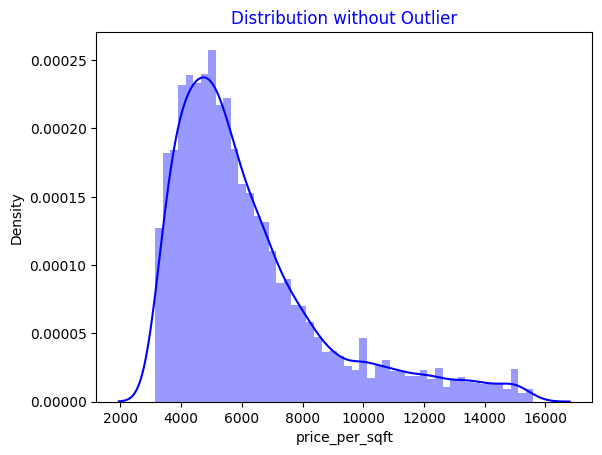

In [25]:
sns.distplot(df2['price_per_sqft'],color='b')
plt.title('Distribution without Outlier',color='b')
plt.show()

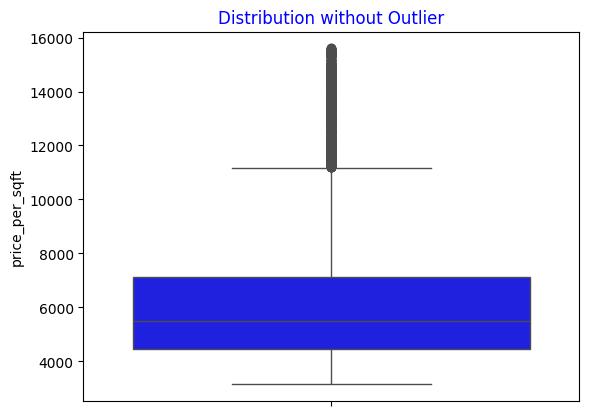

In [24]:
sns.boxplot(df2['price_per_sqft'],color='b')
plt.title('Distribution without Outlier',color='b')
plt.show()

#### Removed 1211 outliers using the percentile method, results a nearly bell-shaped curve in the distplot.

### 3. Outlier Removal Using IQR (Inter quartile range method)

In [26]:
Q1=df.price_per_sqft.quantile(0.25)
Q3=df.price_per_sqft.quantile(0.75)
print("Q1 =",Q1)
print("Q3 =",Q3)

Q1 = 4312.0
Q3 = 7461.0


In [27]:
IQR=Q3-Q1
print("IQR =",IQR)

IQR = 3149.0


In [28]:
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
print("Lower Whisker =",lower_whisker)
print("Upper Whisker =",upper_whisker)

Lower Whisker = -411.5
Upper Whisker = 12184.5


In [29]:
#finding outliers
df.loc[(df.price_per_sqft<lower_whisker) | (df.price_per_sqft > upper_whisker)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13114,other,3 BHK,1903.0,2.0,293.0,3,15396
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571


In [30]:
#without outliers
df3=df.loc[(df.price_per_sqft>lower_whisker) & (df.price_per_sqft<upper_whisker)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [31]:
print("Number of Outliers:",len(df)-len(df3))

Number of Outliers: 1142


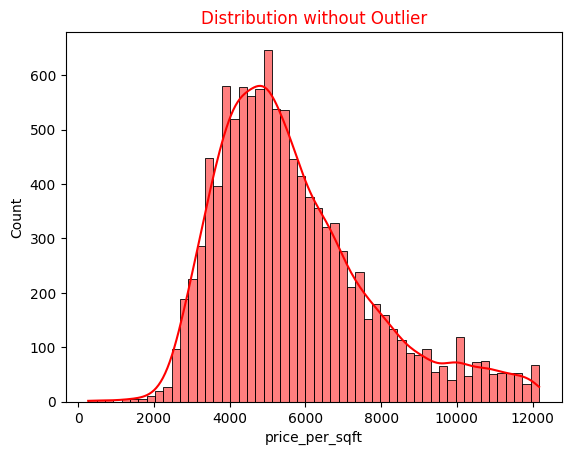

In [32]:
sns.histplot(df3['price_per_sqft'],color='r',kde=True)
plt.title('Distribution without Outlier', color='r')
plt.show()

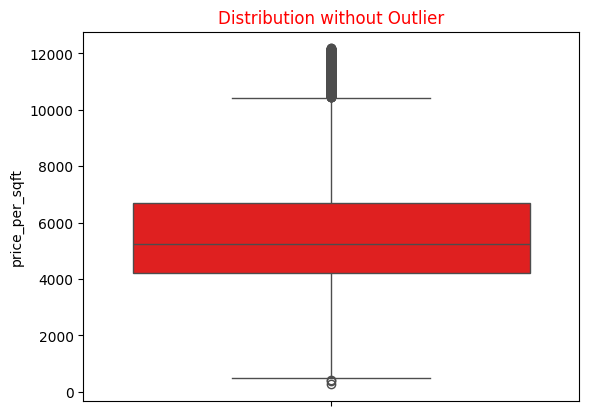

In [33]:
sns.boxplot(df3['price_per_sqft'],color='r')
plt.title('Distribution without Outlier',color='r')
plt.show()

#### Identified 1142 outliers and removed it from the given dataset, results a bell-shape curve in distplot

### 4. Outlier Removal Using Normal distribution

In [82]:
#mean
mean=df.price_per_sqft.mean()
mean

8132.641840177763

In [83]:
#standard deviation
std=df.price_per_sqft.std()
std

111232.90089570847

In [84]:
#-3sigma
min_3sigma=mean-3*std
min_3sigma

-325566.06084694766

In [86]:
#+3sigma
plus_3sigma=mean+3*std
plus_3sigma

341831.3445273032

In [88]:
#finding ouliers
df.loc[(df.price_per_sqft < min_3sigma) | (df.price_per_sqft > plus_3sigma)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [89]:
#without outliers
df4=df.loc[(df.price_per_sqft >= min_3sigma) & (df.price_per_sqft <= plus_3sigma)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [91]:
print("Number of Outliers:" , len(df)-len(df4))

Number of Outliers: 5


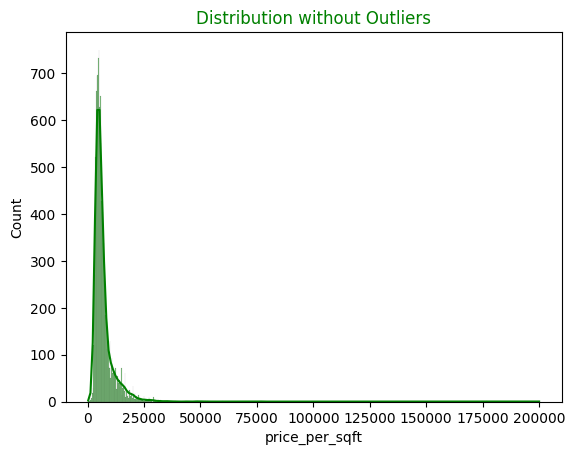

In [100]:
sns.histplot(df4['price_per_sqft'],color='g',kde=True)
plt.title('Distribution without Outliers',color='g')
plt.show()

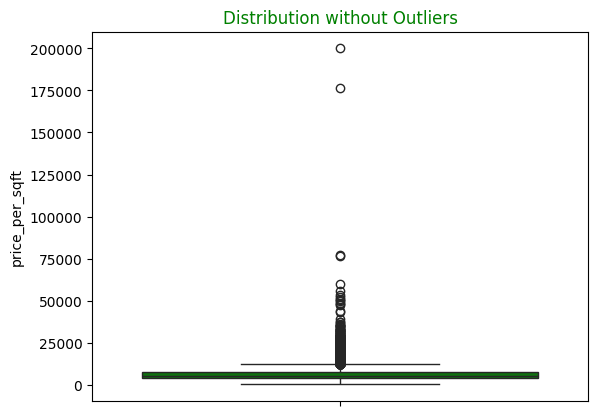

In [95]:
sns.boxplot(df4['price_per_sqft'],color='g')
plt.title('Distribution without Outliers',color='g')
plt.show()

#### Identified 5 outliers and removed it from the given dataset

### 5. Outlier Removal Using Zscore method

In [111]:
mean=df.price_per_sqft.mean()
mean

8132.641840177763

In [112]:
std=df.price_per_sqft.std()
std

111232.90089570847

In [113]:
lower_limit=mean-3*std
lower_limit

-325566.06084694766

In [114]:
upper_limit=mean+3*std
upper_limit

341831.3445273032

In [115]:
#data without outliers
df5=df[(df.price_per_sqft>lower_limit) & (df.price_per_sqft<upper_limit)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [116]:
print("Number of Outliers:" , len(df)-len(df4))

Number of Outliers: 5


C:\Users\hp\AppData\Local\Temp\ipykernel_20532\2529866867.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['price_per_sqft'],color='y')


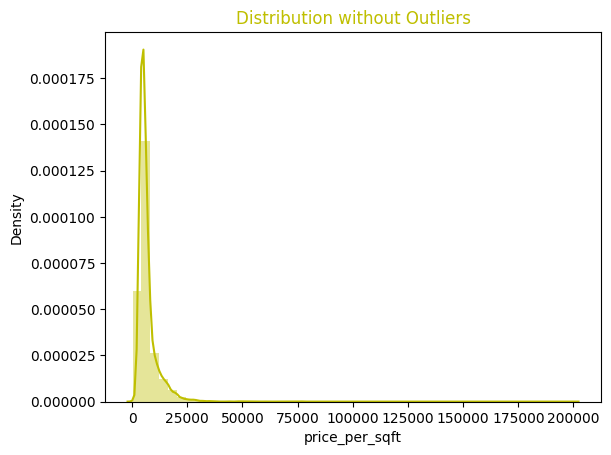

In [117]:
sns.distplot(df4['price_per_sqft'],color='y')
plt.title('Distribution without Outliers',color='y')
plt.show()

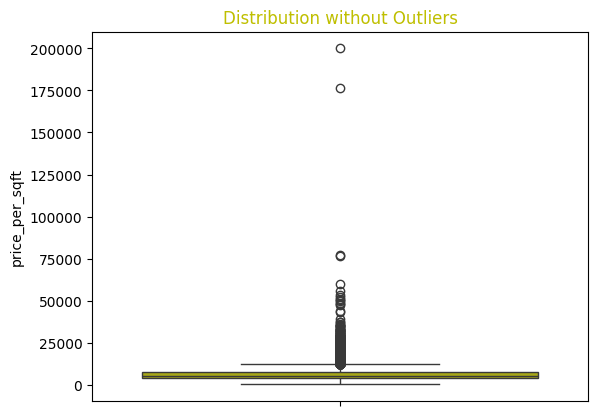

In [118]:
sns.boxplot(df4['price_per_sqft'],color='y')
plt.title('Distribution without Outliers',color='y')
plt.show()

#### Identified 5 outliers and removed it from the given dataset

### Correlation between all the numerical columns

In [119]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [5]:
#finding numerical columns
numerical_col=df.select_dtypes(include=['int', 'float']).columns
numerical_col

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [6]:
#finding correlation
corr_matrix=df[numerical_col].corr()

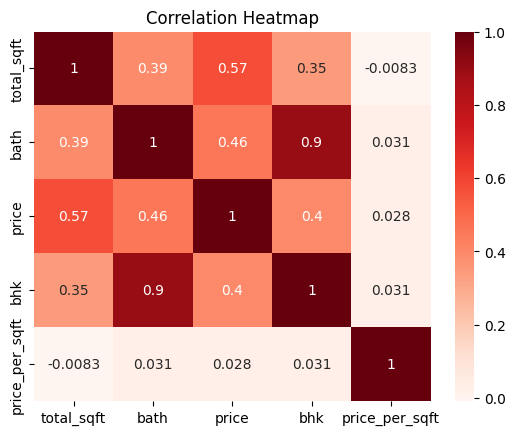

In [7]:
#plotting heatmap
sns.heatmap(corr_matrix, annot=True,cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

1. There is  a negatively(-0.0089) weak correlation visible between total_sqft and price_per_sqft.
2. total_sqft is moderately correlated with bhk(0.34),price(0.57) and bath(0.39). This implies that larger properties tend to have more bedrooms, higher prices, and more bathrooms
3. bath is hoghly correlated with bhk(0.90). This strong correlation indicates that properties with more bedrooms often have a corresponding higher number of bathrooms
4. bath shows moderately correlate with price(0.45) and total_sqft(0.39).This suggests that houses with more bathrooms tend to command higher prices and are typically larger in terms of square footage
5. The heatmap shows how different aspects of a house relate to each other. It points out that the size of the house and the number of bathrooms are closely tied to the price. Knowing this helps us understand what affects house prices. We can use this knowledge to make better predictions about how much a house is worth.

#### Scatter plot 

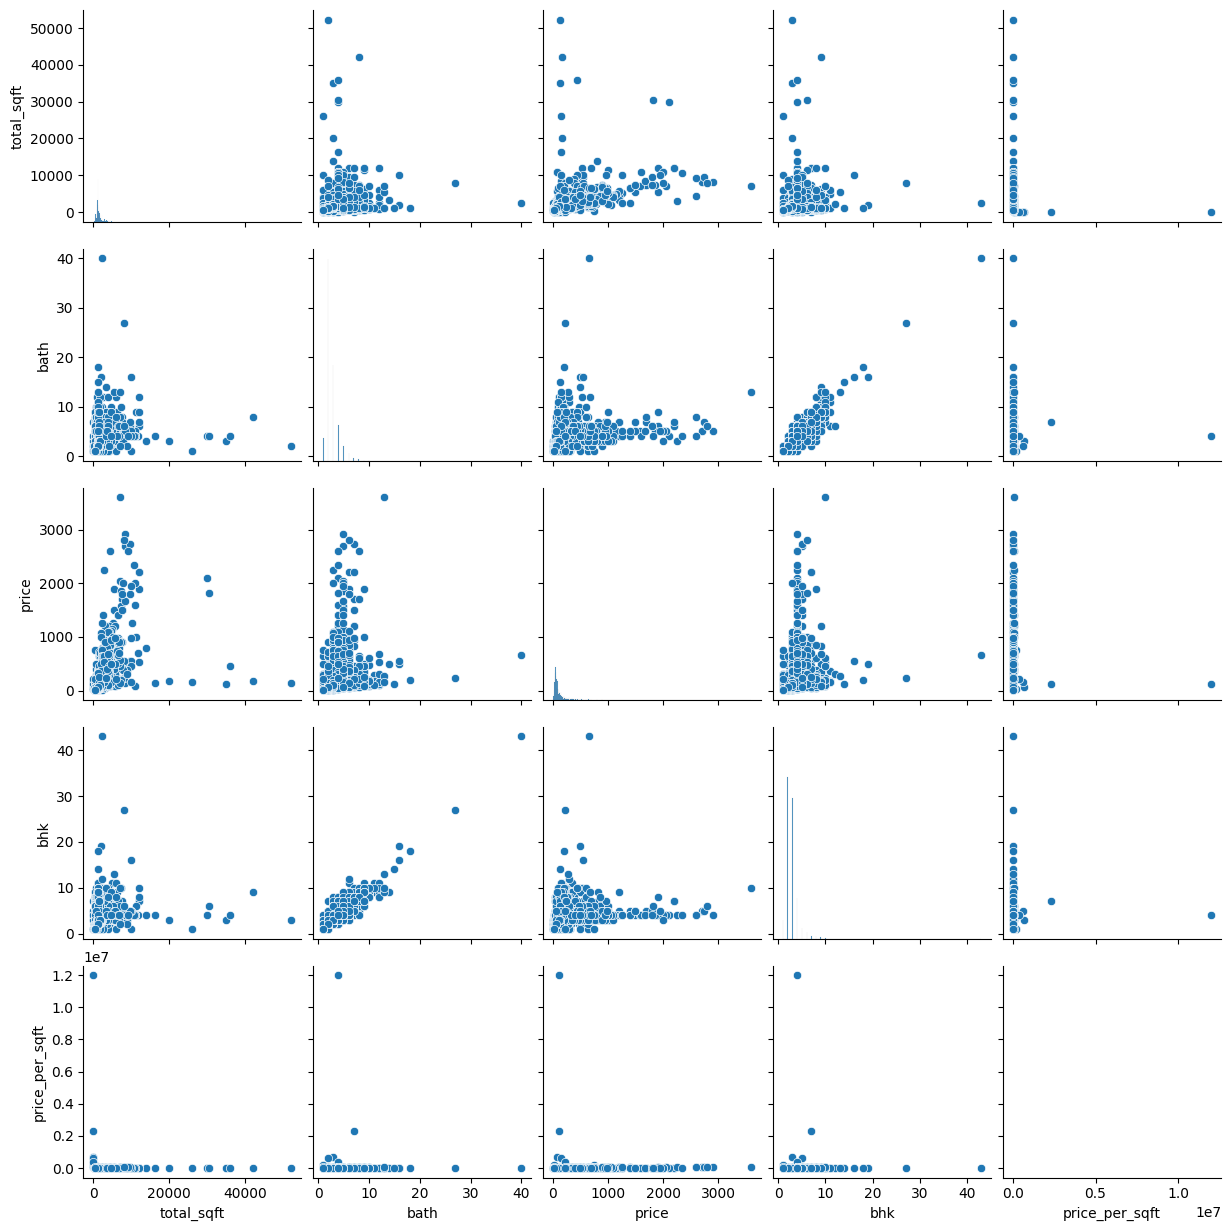

In [9]:
sns.pairplot(df)
plt.show()